In [1]:
# load auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# import stingray
import stingray

/home/fjuhsd/miniconda3/envs/xrb/lib/python3.7/site-packages/stingray/largememory.py:26: UserWarning: Large Datasets may not be processed efficiently due to computational constraints
  "Large Datasets may not be processed efficiently due to "


In [2]:
f = fits.open('/ar1/PROJ/fjuhsd/personal/thaddaeus/data/temp/FS4f_186d5c45-186d62d2.fits')
dt = f[1].header['TIMEDEL']
toa = f[1].data['Time']
lc = stingray.Lightcurve.make_lightcurve(toa=toa, dt=dt)

In [14]:
print(f[1].data['BITPIX'])

KeyError: "Key 'BITPIX' does not exist."

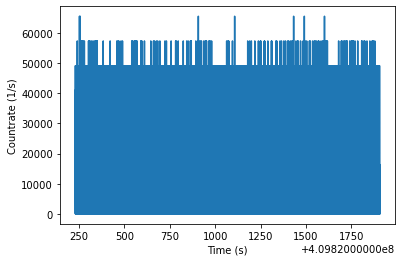

In [3]:
plt.plot(lc.time, lc.countrate)
plt.xlabel('Time (s)')
plt.ylabel('Countrate (1/s)')
plt.show()

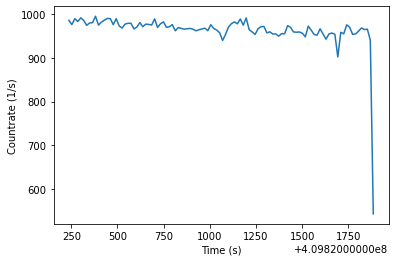

In [4]:
reb_lc = lc.rebin(dt_new=16.0)
# Visualize the lightcurve with binning
plt.plot(reb_lc.time, reb_lc.countrate)
plt.xlabel('Time (s)')
plt.ylabel('Countrate (1/s)')
plt.show()

(1.0, 3.5)

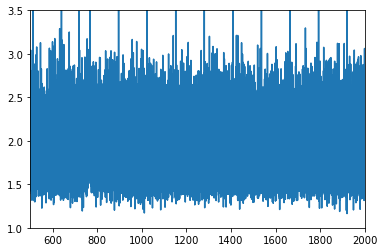

In [5]:
pds = stingray.AveragedPowerspectrum(lc, segment_size=16, norm="leahy")
plt.plot(pds.freq, pds.power)
plt.xlim(500,2000)
plt.ylim(1, 3.5)

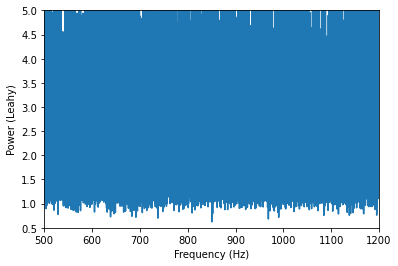

In [12]:
avg_ps = stingray.AveragedPowerspectrum(lc=lc, segment_size=64.0, norm='leahy')

plt.plot(avg_ps.freq, avg_ps.power)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (Leahy)')
plt.ylim(0.5,5)
plt.xlim(500,1200)
plt.show()